In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
rf = pd.read_csv("../results/RF_results.csv")
gb = pd.read_csv('../results/GB_results.csv')
dt_lr_b = pd.read_csv('../results/DT_LR_B_results.csv')

In [4]:
models = pd.concat([rf, gb, dt_lr_b])

In [5]:
models.shape

(652, 32)

In [6]:
summary = pd.pivot_table(models,
                         index=['model_type', 'split_date'],
                         aggfunc='max',
                         fill_value=0)
f1_list = ['f1_at_1', 'f1_at_2', 'f1_at_5',
           'f1_at_10', 'f1_at_20', 'f1_at_30', 'f1_at_50']
p_list = ['p_at_1', 'p_at_2', 'p_at_5', 
          'p_at_10', 'p_at_20', 'p_at_30', 'p_at_50']
recall_list = ['recall_at_1', 'recall_at_2', 'recall_at_5', 
               'recall_at_10', 'recall_at_20', 'recall_at_30', 'recall_at_50']

# Checking precision over time for each classifier

In [7]:
precision_summary = summary.reset_index()
precision_summary[['model_type', 'clf', 'split_date', 'p_at_10']].sort_values('p_at_10', ascending=False)

,model_type,clf,split_date,p_at_10
14,LR,"LogisticRegression(C=10, class_weight=None, du...",2015-01-01,0.556962
12,LR,"LogisticRegression(C=10, class_weight=None, du...",2013-01-01,0.556962
10,GB,GradientBoostingClassifier(criterion='friedman...,2015-01-01,0.544304
6,DT,"DecisionTreeClassifier(class_weight=None, crit...",2015-01-01,0.544304
19,RF,"RandomForestClassifier(bootstrap=True, class_w...",2016-01-01,0.544304
4,DT,"DecisionTreeClassifier(class_weight=None, crit...",2013-01-01,0.544304
8,GB,GradientBoostingClassifier(criterion='friedman...,2013-01-01,0.506329
15,LR,"LogisticRegression(C=10, class_weight=None, du...",2016-01-01,0.506329
16,RF,"RandomForestClassifier(bootstrap=True, class_w...",2013-01-01,0.506329
18,RF,"RandomForestClassifier(bootstrap=True, class_w...",2015-01-01,0.493671


In [8]:
#precision_summary[['model_type', 'clf', 'split_date', 'p_at_10']].sort_values('p_at_10', ascending=False).head(5).values

# Plot

In [9]:
precision_to_plot = precision_summary[["split_date", "p_at_10", "model_type"]].copy()

### Baseline construction

In [10]:
baseline = pd.read_csv('baseline.csv')
baseline.rename(columns={'filing_year': 'split_date', 'correct_with_baseline': 'p_at_10'}, inplace=True)
baseline = baseline.loc[baseline['split_date'].isin(['2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01'])]
baseline['model_type'] = 'Baseline'
precision_to_plot = pd.concat([precision_to_plot, baseline], join='inner')

FileNotFoundError: [Errno 2] File b'baseline.csv' does not exist: b'baseline.csv'

In [11]:
random_baseline = models.groupby('split_date').random_baseline.mean()
random_baseline = random_baseline.to_frame().reset_index()
random_baseline.rename(columns={'random_baseline': 'p_at_10'}, inplace=True)
random_baseline['model_type'] = 'Random Baseline'
precision_to_plot = pd.concat([precision_to_plot, random_baseline])

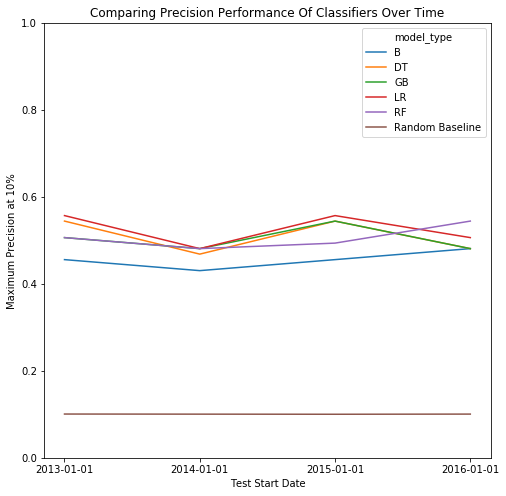

In [12]:
fig, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x="split_date", y="p_at_10", hue="model_type",
             data=precision_to_plot, ax=ax)
ax.set_ylim(0, 1)
ax.set_xlabel("Test Start Date")
ax.set_ylabel("Maximum Precision at 10%")
ax.set_title("Comparing Precision Performance Of Classifiers Over Time")
plt.show()

In [ ]:
summary[p_list].sort_values(by='p_at_10', ascending=False)

# Checking recall over time for each classifier

In [ ]:
m = 0
n = 4
while n < 10:
    df = summary[recall_list].reset_index().iloc[m:n]
    df.set_index('split_date').plot(figsize = (10,5), 
                                grid = True, 
                                title = "Recall over time for classifier {}".format(df['model_type'].iloc[0]))
    plt.show()
    m += 4
    n += 4

In [ ]:
summary[recall_list].sort_values(by='recall_at_10', ascending=False)

# Ranking models based on f1 score at k=10%

In [ ]:
summary[f1_list].sort_values(by='f1_at_10',ascending=False)

# Best model in terms of F1 score

In [ ]:
metric = 'f1_at_10'
highest_f1 = models[models[metric] == models[metric].max()]
highest_f1

In [ ]:
highest_f1['parameters'].values

# Best model in terms of auc-roc score

In [ ]:
metric_auc = 'auc-roc'
highest_auc = models[models[metric_auc] == models[metric_auc].max()]
highest_auc

In [ ]:
highest_auc['parameters'].values